In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np

In [2]:
eval_dir = '/home/juliame/metaphor/results/metaphor_eval/2024-10-07'
plots_dir = '/home/juliame/metaphor/results/plots_dec2024/'
tables_dir = '/home/juliame/metaphor/results/tables_dec2024/'

In [3]:
replace_dict = {}
replace_dict['Meta-Llama-3.1-70B-Instruct'] = 'Llama3.1'
replace_dict['gpt-4o-2024-08-06'] = 'GPT-4o'
replace_dict['gpt-4-turbo-2024-04-09'] = 'GPT-4-Turbo'
replace_dict['zeroshot_description'] = 'Descriptive'
replace_dict['zeroshot_baseline'] = 'Simple'
replace_dict['baseline_sbert-carrier'] = 'SBERT'
replace_dict['sbert'] = 'SBERT'
replace_dict['_score'] = ''
replace_dict['_'] = ' + '

# Metaphor Evaluation on concepts (excluding overall metaphoricity)

In [4]:
def load_results(eval_dir,filename):
    df  = pd.read_csv(os.path.join(eval_dir,filename),sep='\t')
    for col in df.columns:
        if col.startswith('model'):
            df = df[~df[col].str.contains('count')]
            df[col] = df[col].replace(replace_dict,regex=True)
            df = df[~df[col].str.contains('baseline')]
    return df

In [5]:
df_auc_30 = load_results(eval_dir,'auc_results_all_scores.tsv')
df_auc = load_results(eval_dir,'auc_results_different_thresholds_all_scores.tsv')
df_spearman = load_results(eval_dir,'spearman_results_all_scores.tsv')
df_comp_auc = load_results(eval_dir,'comparison_auc_results_all_scores.tsv')
df_comp_spearman = load_results(eval_dir,'comparison_spearman_results_all_scores.tsv')
    

(array([0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9')])

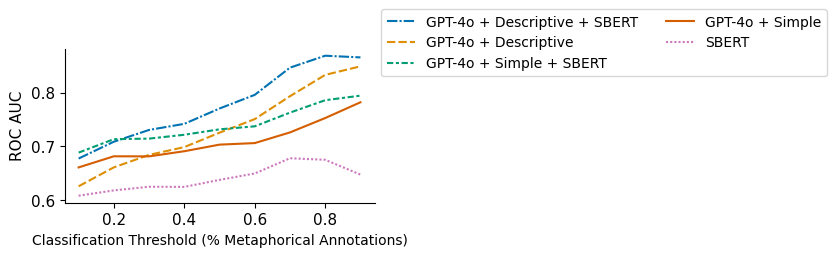

In [26]:
fit,ax = plt.subplots(figsize=(4,2))
incl_models = ['SBERT','GPT-4o + Simple','GPT-4o + Simple + SBERT','GPT-4o + Descriptive','GPT-4o + Descriptive + SBERT']

sns.lineplot(x='threshold',y='roc_auc',hue='model',data=df_auc[df_auc['model'].isin(incl_models)],
            hue_order = incl_models[::-1],palette='colorblind',style='model')
sns.despine()
plt.legend(title='',ncol=2,bbox_to_anchor=(1,1.3))
plt.xlabel('Classification Threshold (% Metaphorical Annotations)',fontsize=10)
plt.ylabel('ROC AUC',fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
#plt.savefig(os.path.join(plots_dir,'auc_all_concepts_by_threshold.pdf'),bbox_inches='tight')

In [61]:
df_auc.pivot(index='model',columns='threshold',values='roc_auc').round(3)

threshold,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
model,,,,,,,,,
GPT-4-Turbo + Descriptive,0.648,0.672,0.702,0.720,0.748,0.781,0.802,0.828,0.845
GPT-4-Turbo + Descriptive + SBERT,0.695,0.717,0.746,0.760,0.789,0.817,0.844,0.859,0.859
GPT-4-Turbo + Simple,0.688,0.660,0.643,0.640,0.650,0.642,0.673,0.679,0.724
GPT-4-Turbo + Simple + SBERT,0.714,0.695,0.682,0.679,0.689,0.682,0.718,0.726,0.752
GPT-4o + Descriptive,0.626,0.661,0.684,0.699,0.726,0.751,0.794,0.833,0.849
GPT-4o + Descriptive + SBERT,0.677,0.709,0.731,0.742,0.771,0.796,0.847,0.869,0.866
GPT-4o + Simple,0.661,0.682,0.681,0.691,0.703,0.706,0.726,0.753,0.782
GPT-4o + Simple + SBERT,0.688,0.713,0.715,0.722,0.732,0.737,0.763,0.786,0.795
Llama3.1 + Descriptive,0.508,0.509,0.512,0.511,0.513,0.510,0.504,0.499,0.497


In [62]:
df_auc_30.pivot(index='model',columns='concept',values='roc_auc').round(3)

concept,all_documents,animal,commodity,parasite,pressure,vermin,war,water
model,,,,,,,,
GPT-4-Turbo + Descriptive,0.703,0.747,0.691,0.762,0.635,0.599,0.649,0.795
GPT-4-Turbo + Descriptive + SBERT,0.748,0.844,0.712,0.801,0.688,0.727,0.712,0.819
GPT-4-Turbo + Simple,0.642,0.658,0.575,0.673,0.538,0.606,0.698,0.809
GPT-4-Turbo + Simple + SBERT,0.683,0.736,0.598,0.702,0.581,0.671,0.760,0.830
GPT-4o + Descriptive,0.684,0.682,0.655,0.744,0.595,0.547,0.661,0.868
GPT-4o + Descriptive + SBERT,0.732,0.812,0.673,0.795,0.647,0.705,0.723,0.890
GPT-4o + Simple,0.681,0.731,0.613,0.662,0.563,0.610,0.714,0.856
GPT-4o + Simple + SBERT,0.715,0.806,0.642,0.706,0.606,0.740,0.767,0.861
Llama3.1 + Descriptive,0.512,0.504,0.534,0.517,0.504,0.500,0.500,0.505


In [64]:
df_spearman.pivot(index='model',columns='concept',values='r').round(3)

concept,all_documents,animal,commodity,overall,parasite,pressure,vermin,war,water
model,,,,,,,,,
GPT-4-Turbo + Descriptive,0.529,0.537,0.448,NaN,0.623,0.419,0.376,0.436,0.656
GPT-4-Turbo + Descriptive + SBERT,0.504,0.619,0.466,NaN,0.543,0.398,0.407,0.489,0.629
GPT-4-Turbo + Simple,0.333,0.366,0.167,NaN,0.317,0.119,0.239,0.445,0.660
GPT-4-Turbo + Simple + SBERT,0.397,0.499,0.242,NaN,0.348,0.201,0.350,0.540,0.662
GPT-4o + Descriptive,0.529,0.479,0.433,NaN,0.594,0.414,0.251,0.456,0.767
GPT-4o + Descriptive + SBERT,0.480,0.591,0.396,NaN,0.520,0.352,0.348,0.500,0.733
GPT-4o + Simple,0.424,0.413,0.225,NaN,0.361,0.214,0.347,0.482,0.744
GPT-4o + Simple + SBERT,0.443,0.545,0.286,NaN,0.377,0.262,0.428,0.565,0.710
Llama3.1 + Descriptive,0.076,-0.027,0.130,NaN,0.110,0.121,NaN,NaN,0.066


In [69]:
model = 'GPT-4o + Descriptive + SBERT'
df_comp_auc_sub = df_comp_auc[(df_comp_auc['model1']==model) | (df_comp_auc['model2']==model)]
df_comp_auc_sub
# At the 30% classification threshold, our selected model for analysis (GPT-4o, Descriptive, SBERT) significantly outperforms 
# nearly all other models, though the difference with (GPT-4o,Simple,SBERT) is not significant.
# (GPT-4-Turbo, Descriptive, SBERT) outperforms 4o, but is not stat. sig. and much more expensive. 

,model1,model2,auc1,auc2,sig
10,Llama3.1 + Simple,GPT-4o + Descriptive + SBERT,0.661995,0.731982,True
20,Llama3.1 + Descriptive,GPT-4o + Descriptive + SBERT,0.511612,0.731982,True
29,GPT-4-Turbo + Simple,GPT-4o + Descriptive + SBERT,0.642362,0.731982,True
37,GPT-4-Turbo + Descriptive,GPT-4o + Descriptive + SBERT,0.702952,0.731982,True
44,GPT-4o + Simple,GPT-4o + Descriptive + SBERT,0.680994,0.731982,True
50,GPT-4o + Descriptive,GPT-4o + Descriptive + SBERT,0.684247,0.731982,True
55,Llama3.1 + Simple + SBERT,GPT-4o + Descriptive + SBERT,0.704089,0.731982,True
59,Llama3.1 + Descriptive + SBERT,GPT-4o + Descriptive + SBERT,0.637691,0.731982,True
62,GPT-4-Turbo + Simple + SBERT,GPT-4o + Descriptive + SBERT,0.682926,0.731982,True
64,GPT-4-Turbo + Descriptive + SBERT,GPT-4o + Descriptive + SBERT,0.747690,0.731982,False


In [75]:
model = 'GPT-4o + Descriptive + SBERT'
df_comp_spearman_sub = df_comp_spearman[(df_comp_spearman['model1']==model) | (df_comp_spearman['model2']==model)]
df_comp_spearman_sub = df_comp_spearman_sub[df_comp_spearman_sub['concept']=='all_documents']
df_comp_spearman_sub['sig'] =  np.where(df_comp_spearman_sub['p'] < .05, True, False)
df_comp_spearman_sub.sort_values(by='r1')
# Sig better than most models. GPT-4o and Turbo with Descriptive but no SBERT have higher correlations but not stat sig 

,model1,model2,concept,r1,r2,z,p,sig
1925,Llama3.1 + Descriptive,GPT-4o + Descriptive + SBERT,all_documents,0.076131,0.480437,-11.821050,0.000000e+00,True
2042,SBERT,GPT-4o + Descriptive + SBERT,all_documents,0.259750,0.480437,-6.811102,9.685364e-12,True
2072,Llama3.1 + Descriptive + SBERT,GPT-4o + Descriptive + SBERT,all_documents,0.273015,0.480437,-6.433745,1.244975e-10,True
1958,GPT-4-Turbo + Simple,GPT-4o + Descriptive + SBERT,all_documents,0.332616,0.480437,-4.698708,2.618126e-06,True
1888,Llama3.1 + Simple,GPT-4o + Descriptive + SBERT,all_documents,0.379179,0.480437,-3.289145,1.004923e-03,True
2075,GPT-4-Turbo + Simple + SBERT,GPT-4o + Descriptive + SBERT,all_documents,0.396803,0.480437,-2.740791,6.129142e-03,True
2068,Llama3.1 + Simple + SBERT,GPT-4o + Descriptive + SBERT,all_documents,0.411475,0.480437,-2.277299,2.276836e-02,True
2012,GPT-4o + Simple,GPT-4o + Descriptive + SBERT,all_documents,0.423668,0.480437,-1.886976,5.916353e-02,False
2078,GPT-4o + Simple + SBERT,GPT-4o + Descriptive + SBERT,all_documents,0.443156,0.480437,-1.252777,2.102868e-01,False
2077,GPT-4-Turbo + Descriptive + SBERT,GPT-4o + Descriptive + SBERT,all_documents,0.503805,0.480437,0.815100,4.150149e-01,False


In [28]:
new_replace_dict = {}
new_replace_dict[r' \+ SBERT'] = ''
new_replace_dict[r' \+ '] = r'\n'

df30_all = df_auc_30.copy()
df30_all['Add SBERT'] = df30_all['model'].apply(lambda x: 'Yes' if 'SBERT' in x else 'No')
df30_all['model'] = df30_all['model'].replace(' + SBERT','',regex=True)
df30_all['model'] = df30_all['model'].replace(new_replace_dict,regex=True)

In [29]:
df30_all

,model,concept,roc_auc,Add SBERT
1,Llama3.1\nSimple,war,0.698939,No
3,Llama3.1\nDescriptive,war,0.500000,No
5,GPT-4-Turbo\nSimple,war,0.697677,No
7,GPT-4-Turbo\nDescriptive,war,0.648788,No
9,GPT-4o\nSimple,war,0.713687,No
...,...,...,...,...
171,Llama3.1\nDescriptive,all_documents,0.637691,Yes
172,GPT-4-Turbo\nSimple,all_documents,0.682926,Yes
173,GPT-4-Turbo\nDescriptive,all_documents,0.747690,Yes
174,GPT-4o\nSimple,all_documents,0.714889,Yes


In [30]:
df30_all[df30_all['Add SBERT'] == 'Yes'].sort_values(by='roc_auc')['model']

84          GPT-4-Turbo\nSimple
82             Llama3.1\nSimple
78                        SBERT
83        Llama3.1\nDescriptive
56                        SBERT
62          GPT-4-Turbo\nSimple
122                       SBERT
86               GPT-4o\nSimple
61        Llama3.1\nDescriptive
127       Llama3.1\nDescriptive
60             Llama3.1\nSimple
166                       SBERT
171       Llama3.1\nDescriptive
64               GPT-4o\nSimple
87          GPT-4o\nDescriptive
12                        SBERT
17        Llama3.1\nDescriptive
144                       SBERT
106         GPT-4-Turbo\nSimple
65          GPT-4o\nDescriptive
149       Llama3.1\nDescriptive
172         GPT-4-Turbo\nSimple
85     GPT-4-Turbo\nDescriptive
105       Llama3.1\nDescriptive
100                       SBERT
128         GPT-4-Turbo\nSimple
170            Llama3.1\nSimple
109         GPT-4o\nDescriptive
130              GPT-4o\nSimple
19     GPT-4-Turbo\nDescriptive
63     GPT-4-Turbo\nDescriptive
174     

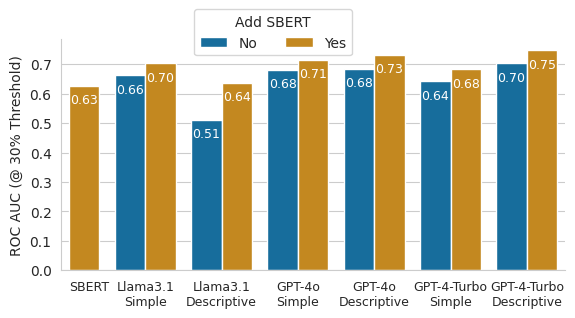

In [41]:
sns.set_style('whitegrid')
model_order = ['SBERT','Llama3.1\nSimple','Llama3.1\nDescriptive','GPT-4o\nSimple','GPT-4o\nDescriptive',
               'GPT-4-Turbo\nSimple','GPT-4-Turbo\nDescriptive']


fig,axes = plt.subplots(figsize=(6.5,3))
ax = sns.barplot(data=df30_all[df30_all['concept']=='all_documents'],x='model',y='roc_auc',
            hue = 'Add SBERT',order=model_order,ax=axes,palette='colorblind')
ax.get_xaxis().majorTicks[0].label1.set_horizontalalignment('left')
sns.despine()
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=-15,color='white',fontsize=9)
plt.xlim(-.1,6.5)
plt.xlabel('')
plt.ylabel('ROC AUC (@ 30% Threshold)',fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.legend(title='Add SBERT',fontsize=10,bbox_to_anchor=(0.25,.9),ncol=2)
plt.savefig(os.path.join(plots_dir,'auc30_sbert_effect.pdf'),bbox_inches='tight')

# Overall metaphoricity evaluation

In [98]:
overall_df_auc_30 = load_results(eval_dir,'auc_results_overall_metaphoricity.tsv')
overall_df_auc = load_results(eval_dir,'auc_results_different_thresholds_overall_metaphoricity.tsv')
overall_df_spearman = load_results(eval_dir,'spearman_results_overall_metaphoricity.tsv')
overall_df_comp_auc = load_results(eval_dir,'comparison_auc_results_overall_metaphoricity.tsv')
overall_df_comp_spearman = load_results(eval_dir,'comparison_spearman_results_overall_metaphoricity.tsv')
    

In [99]:
overall_df_auc_30

,model,concept,roc_auc
1,Llama3.1 + Simple,overall,0.691964
3,Llama3.1 + Descriptive,overall,0.656351
5,GPT-4-Turbo + Simple,overall,0.685369
7,GPT-4-Turbo + Descriptive,overall,0.619673
9,GPT-4o + Simple,overall,0.510248
11,GPT-4o + Descriptive,overall,0.660714


In [110]:
overall_df_auc_30.merge(overall_df_spearman,on='model')[['model','roc_auc','r']].round(3)
# For overall metaphoricity, LLama3.1-simple is best on both spearman and roc
# Lower performance than concept-specific so excluded from analysis

,model,roc_auc,r
0,Llama3.1 + Simple,0.692,0.412
1,Llama3.1 + Descriptive,0.656,0.397
2,GPT-4-Turbo + Simple,0.685,0.366
3,GPT-4-Turbo + Descriptive,0.620,0.321
4,GPT-4o + Simple,0.510,0.092
5,GPT-4o + Descriptive,0.661,0.395


In [113]:
overall_df_auc.pivot(index='model',columns='threshold',values='roc_auc').round(3).sort_index(ascending=False)

threshold,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
model,,,,,,,,,
Llama3.1 + Simple,0.652,0.707,0.691,0.680,0.699,0.682,0.677,0.679,0.802
Llama3.1 + Descriptive,0.641,0.667,0.651,0.695,0.706,0.713,0.672,0.742,0.932
GPT-4o + Simple,0.638,0.552,0.516,0.528,0.528,0.519,0.517,0.357,0.636
GPT-4o + Descriptive,0.613,0.641,0.664,0.663,0.673,0.664,0.699,0.753,0.867
GPT-4-Turbo + Simple,0.716,0.698,0.689,0.680,0.671,0.638,0.560,0.549,0.568
GPT-4-Turbo + Descriptive,0.651,0.658,0.618,0.636,0.667,0.673,0.673,0.670,0.751
